In [1]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import scipy
import matplotlib.pyplot as plt

In [51]:
#Load all datasets
# settlement data
#Liberia_country = gpd.read_file('D:\\Liberia Mini Grid project\\national-boundary.geojson')
#print(Liberia_country.columns)

settlements = gpd.read_file('D:\\Liberia Mini Grid project\\settlements2.shp')
#print(settlements.columns)

#power source infrastructure(transformers, substation)
power_sources = gpd.read_file('D:\\Liberia Mini Grid project\\merged_powersources1.shp')
#print(power_sources.columns)

# Facilities data(education, health and buildings)
facilities = gpd.read_file('D:\\Liberia Mini Grid project\\merged_facilities1.shp')
#print(facilities.columns)

# road network
road_network = gpd.read_file('D:\\Liberia Mini Grid project\\road_network.shp')
#print(road_network.columns)

# Load population density data (replace 'path_to_population_density.shp' with actual file path)
population_density = gpd.read_file('D:\\Liberia Mini Grid project\\population_data.shp')
#print(population_density.columns)

In [53]:
# Define criteria weights
criteria_weights = {
    'Distance_from_power_sources': 3,
    'Proximity_to_facilities': 3,
    'Proximity_to_road_network': 2,
    'Population_Density': 2
}

Distances to Power Sources:
                  geometry  Distance_to_Power_Source
0  POINT (0.00000 0.00000)             742953.495089
1  POINT (0.20000 0.20000)             742953.212673
2  POINT (1.00000 1.00000)             742952.083010
Index(['geometry', 'Distance_to_Power_Source'], dtype='object')
                  geometry  Distance_to_Power_Source
0  POINT (0.00000 0.00000)             742953.495089
1  POINT (0.20000 0.20000)             742953.212673
2  POINT (1.00000 1.00000)             742952.083010


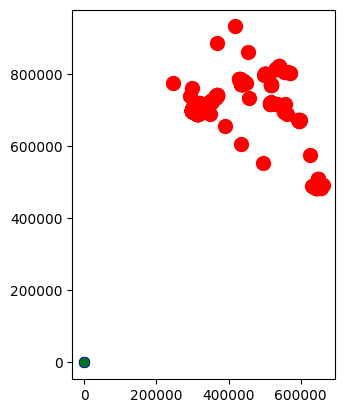

In [81]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Criteria
distance_threshold_power_sources = 50000  #meters

# Distance matrix to power source
settlements['Distance_to_Power_Source'] = settlements.apply(
    lambda row: power_sources.distance(row['geometry']).min(), axis=1
)

# Print output
print("Distances to Power Sources:")
print(settlements[['geometry', 'Distance_to_Power_Source']])

#distances greater than the threshold
settlement_power = settlements[settlements['Distance_to_Power_Source'] > distance_threshold_power_sources]

# Print the number of rows in gdf
#print("Number of rows in suitable_sites_power:", len(settlement_power))
print(settlement_power.columns)
print(settlement_power)
# Plot output
ax = settlements.plot(marker='o', color='blue', markersize=50, label='Settlements')
power_sources.plot(ax=ax, color='red', markersize=100, label='Power Sources')
settlement_power.plot(ax=ax, color='green', alpha=0.5, label='Suitable Power-sources')
plt.show()

Index(['geometry', 'Proximity_to_facilities'], dtype='object')
                  geometry  Proximity_to_facilities
0  POINT (0.00000 0.00000)                     True
1  POINT (0.20000 0.20000)                     True
2  POINT (1.00000 1.00000)                     True


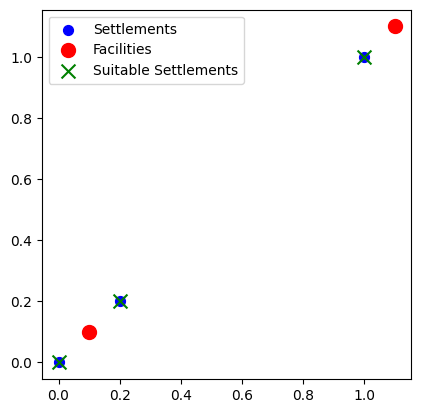

In [82]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, polygon
import geopandas as gpd

# criteria
radius_facilities = 600  #meters

#decompoing lambda
def is_within_buffer(point, facilities, radius_facilities):
    # Check if the point is within the buffer of any facility
    return any(facilities.geometry.buffer(radius_facilities).contains(point))


# sample gdf
settlements = gpd.GeoDataFrame({
    'geometry': [Point(0, 0), Point(0.2, 0.2), Point(1, 1)],
})

facilities = gpd.GeoDataFrame({
    'geometry': [Point(0.1, 0.1), Point(1.1, 1.1)],
})

# Spatial indexing
facilities_indexing = facilities.sindex

#Set geometry column explicitly
settlements = settlements.set_geometry('geometry')

# Identify settlements
settlements_facilities = settlements.copy()
settlements_facilities['Proximity_to_facilities'] = settlements.geometry.apply(
    lambda point: is_within_buffer(point, facilities, radius_facilities)
)

print(settlements_facilities.columns)
print(settlements_facilities)


# Plot output
# Plot output as a scatter plot
fig, ax = plt.subplots()
settlements.plot(ax=ax, marker='o', color='blue', markersize=50, label='Settlements')
facilities.plot(ax=ax, color='red', markersize=100, label='Facilities')
settlements_facilities.plot(ax=ax, marker='x', color='green', markersize=100, label='Suitable Settlements')
plt.legend()
plt.show()

Index(['geometry', 'Proximity_to_Roads'], dtype='object')
                  geometry  Proximity_to_Roads
0  POINT (0.00000 0.00000)                True
1  POINT (0.20000 0.20000)                True
2  POINT (1.00000 1.00000)                True


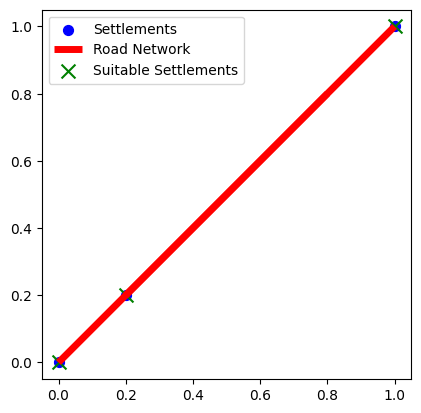

In [70]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import geopandas as gpd

#decomposing lambda
def is_within_buffer(point, road_network, radius_road_network):
    # Check if any part of the MultiLineString is within the buffer of the point
    return any(road_network.geometry.buffer(radius_road_network).intersects(point))


# Example usage
radius_road_network = 1500  # meters

# Create a sample GeoDataFrame for illustration purposes
settlements = gpd.GeoDataFrame({
    'geometry': [Point(0, 0), Point(0.2, 0.2), Point(1, 1)],
})

# Create a sample road network GeoDataFrame with LineString geometries
road_network = gpd.GeoDataFrame({
'geometry': [LineString([(0, 0), (0.5, 0.5), (1, 1)]), LineString([(0.2, 0.2), (0.8, 0.8)])],
})

# Spatial indexing
road_network_sindex = road_network.sindex

settlements = settlements.set_geometry('geometry')

# Identify settlements
settlements_road = settlements.copy()

# Identify suitable settlements using the decomposed function
settlements_road['Proximity_to_Roads'] = settlements.geometry.apply(
    lambda point: is_within_buffer(Point(point.x, point.y), road_network, radius_road_network)
)

print(settlements_road.columns)
print(settlements_road)
# Plot output
ax = settlements.plot(marker='o', color='blue', markersize=50, label='Settlements')
road_network.plot(ax=ax, color='red', linewidth=5, label='Road Network')
settlements_road.plot(ax=ax, marker='x', color='green', markersize=100, label='Suitable Settlements')
plt.legend()
plt.show()

Index(['geometry', 'In_Dense_Population_Area'], dtype='object')
                  geometry  In_Dense_Population_Area
0  POINT (0.00000 0.00000)                      True
1  POINT (0.20000 0.20000)                      True
2  POINT (1.00000 1.00000)                      True


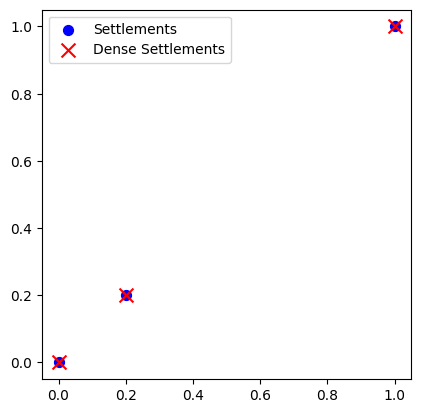

In [83]:
# Identify settlements

import geopandas as gpd
import matplotlib.pyplot as plt


# Create a sample gdf
settlements = gpd.GeoDataFrame({
    'geometry': [Point(0, 0), Point(0.2, 0.2), Point(1, 1)],
})

# Create a sample gdf for population data
population_data = {
    'population': [1000, 500, 1500]
}

population = gpd.GeoDataFrame(population_data, geometry=settlements.geometry)

#spatial index
population_indexing = population_density.sindex
# define threshold
population_density_threshold = 1000  #persons per square unit

# Calculate population density
population['population_density'] = population['population'] / settlements.geometry.area

# a column to shown dense areas
settlements['In_Dense_Population_Area'] = settlements.geometry.apply(
    lambda point: any(population.loc[population.sindex.query(point, predicate='intersects')]['population_density'] > population_density_threshold)
)

# Filter settlements based on the new column
population_settlements = settlements[settlements['In_Dense_Population_Area']]

print(population_settlements.columns)
print(population_settlements)
# Plot output
ax = settlements.plot(marker='o', color='blue', markersize=50, label='Settlements')
population_settlements.plot(ax=ax, marker='x', color='red', markersize=100, label='Dense Settlements')
plt.legend()
plt.show()

Index(['geometry', 'Distance_to_Power_Source', 'Proximity_to_facilities',
       'In_Dense_Population_Area', 'Proximity_to_Roads'],
      dtype='object')
                  geometry  Distance_to_Power_Source  Proximity_to_facilities  \
0  POINT (0.00000 0.00000)             742953.495089                     True   
1  POINT (0.20000 0.20000)             742953.212673                     True   
2  POINT (1.00000 1.00000)             742952.083010                     True   

   In_Dense_Population_Area  Proximity_to_Roads  
0                      True                True  
1                      True                True  
2                      True                True  


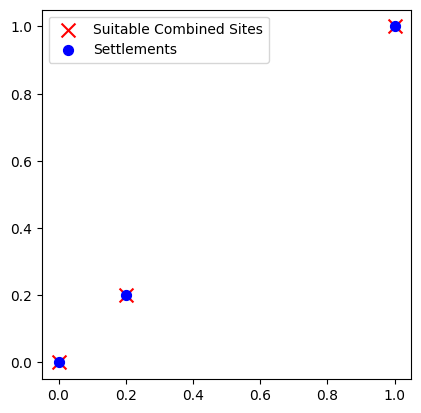

In [75]:
# Combine the suitability criteria
import matplotlib.pyplot as plt

suitable_settlements_combined = settlement_power.merge(
    settlements_facilities, how='inner', on='geometry'
)

suitable_settlements_combined = suitable_settlements_combined.merge(
    population_settlements, how='inner', on='geometry'
)

suitable_settlements_combined = suitable_settlements_combined.merge(
    settlements_road, how='inner', on='geometry'
)

#print columns in  combined layer
print(suitable_settlements_combined.columns)
print(suitable_settlements_combined)

# Plot output
ax = suitable_settlements_combined.plot(
    marker='x', color='red', markersize=100, label='Suitable Combined Sites', aspect='equal'
)
settlements.plot(ax=ax, marker='o', color='blue', markersize=50, label='Settlements')
plt.legend()
plt.show()

                  geometry  Normalized_Suitability
0  POINT (0.00000 0.00000)                     1.0
1  POINT (0.20000 0.20000)                     0.8
2  POINT (1.00000 1.00000)                     0.0


C:\Users\jilli\AppData\Local\Temp\ipykernel_8812\3357871024.py:22: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  suitable_settlements_combined.to_file(file_path)


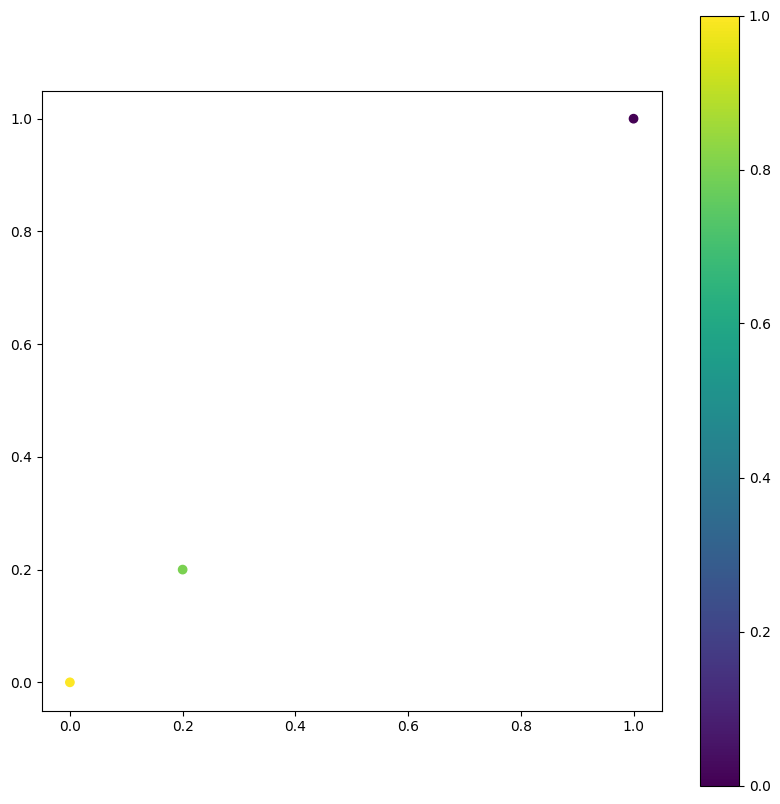

In [76]:
# Calculate a suitability index based on criteria weights
suitable_settlements_combined['Suitability_Index'] = (
    criteria_weights['Distance_from_power_sources'] * suitable_settlements_combined['Distance_to_Power_Source'] +
    criteria_weights['Proximity_to_facilities'] * suitable_settlements_combined['Proximity_to_facilities'] +
    criteria_weights['Proximity_to_road_network'] * suitable_settlements_combined['Proximity_to_Roads'] +
    criteria_weights['Population_Density'] * suitable_settlements_combined['In_Dense_Population_Area']
)

# Normalize the suitability index
scaler = MinMaxScaler()
suitable_settlements_combined['Normalized_Suitability'] = scaler.fit_transform(
    suitable_settlements_combined[['Suitability_Index']]
)

# Print or visualize the results as needed
print(suitable_settlements_combined[['geometry', 'Normalized_Suitability']])

# Define the output shapefile path
file_path = 'D:\\Liberia Mini Grid project\\sites_suitable.shp'

# Export GeoDataFrame to a shapefile
suitable_settlements_combined.to_file(file_path)

# Plot the suitability map
fig, ax = plt.subplots(figsize=(10, 10))
suitable_settlements_combined.plot(column='Normalized_Suitability', cmap='viridis', legend=True, ax=ax)

# Save map as an image
output_image_path = 'D:\\Liberia Mini Grid project\\suitability_layer.png'
plt.savefig(output_image_path, format='png', dpi=300)

# Show the plot
plt.show()